---
### Proyecto Retail 
### Fase 1. Exploración de los datos
### Por: Equipo 5 (Luis Hermenegildo)
---

---
#### Carga de librerias
---

In [1]:
#Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import hasNullData

---
#### Lectura de archivo y carga exploración de datos
---

In [2]:
# Cargar los datos
df = pd.read_csv('../../data/OnlineRetail_clean.csv', encoding='ISO-8859-1')
# Mostrar las primeras filas
df.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


---
#### Establecimiento de tipos de datos
---

In [3]:
# Convertir InvoiceDate a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int64         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalSpent   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.0+ MB


---
#### Exploración de datos
---

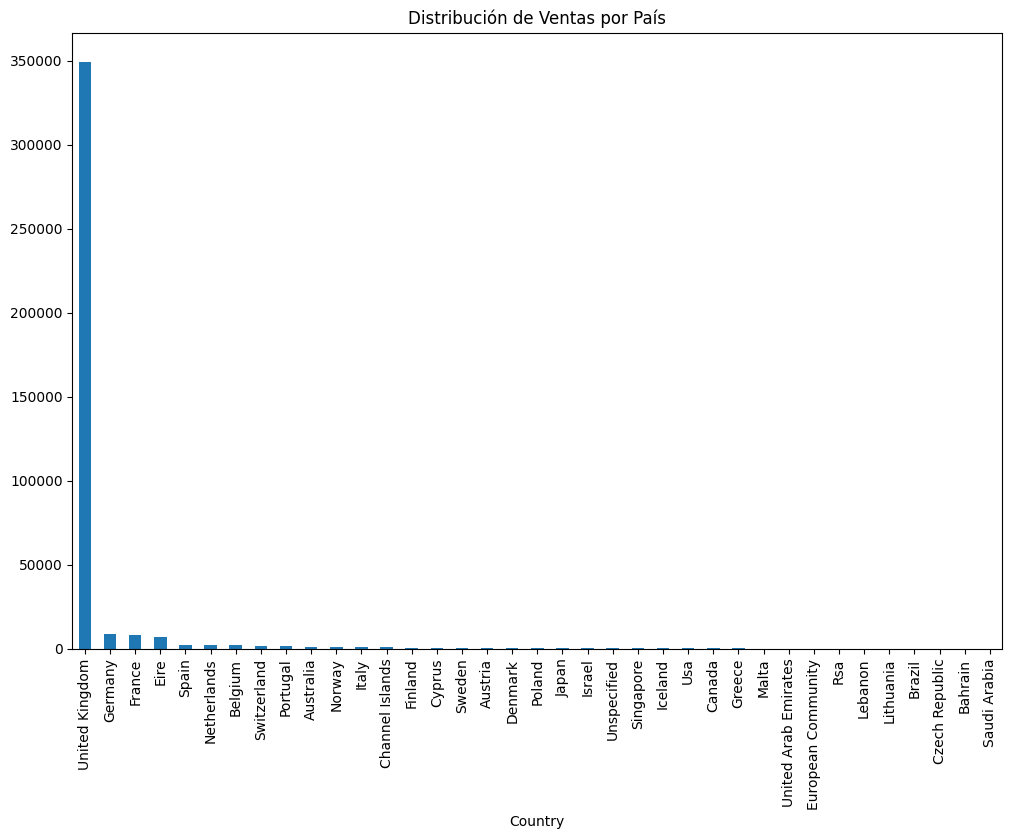

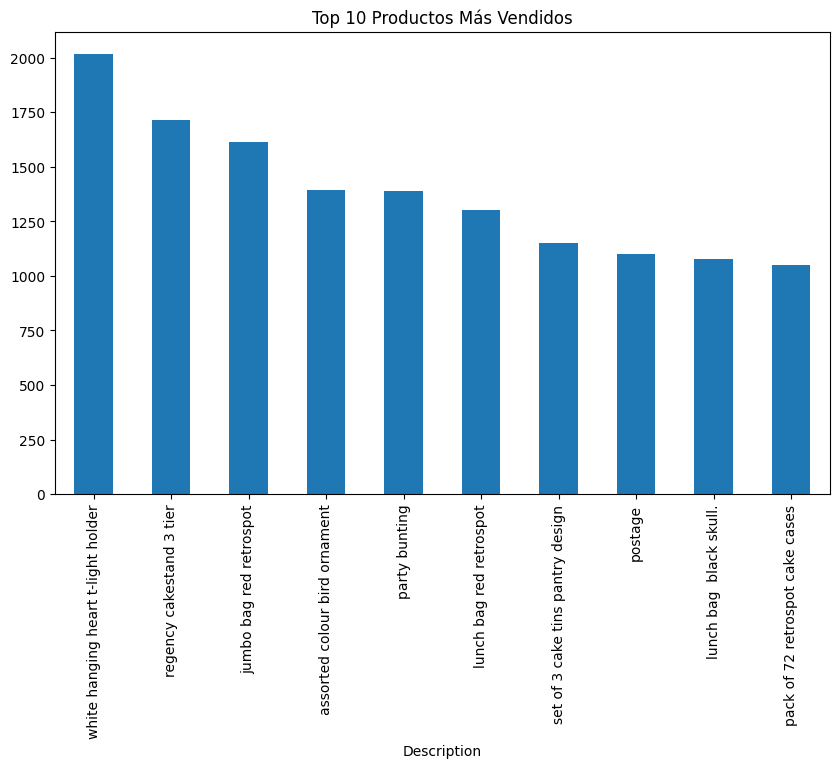

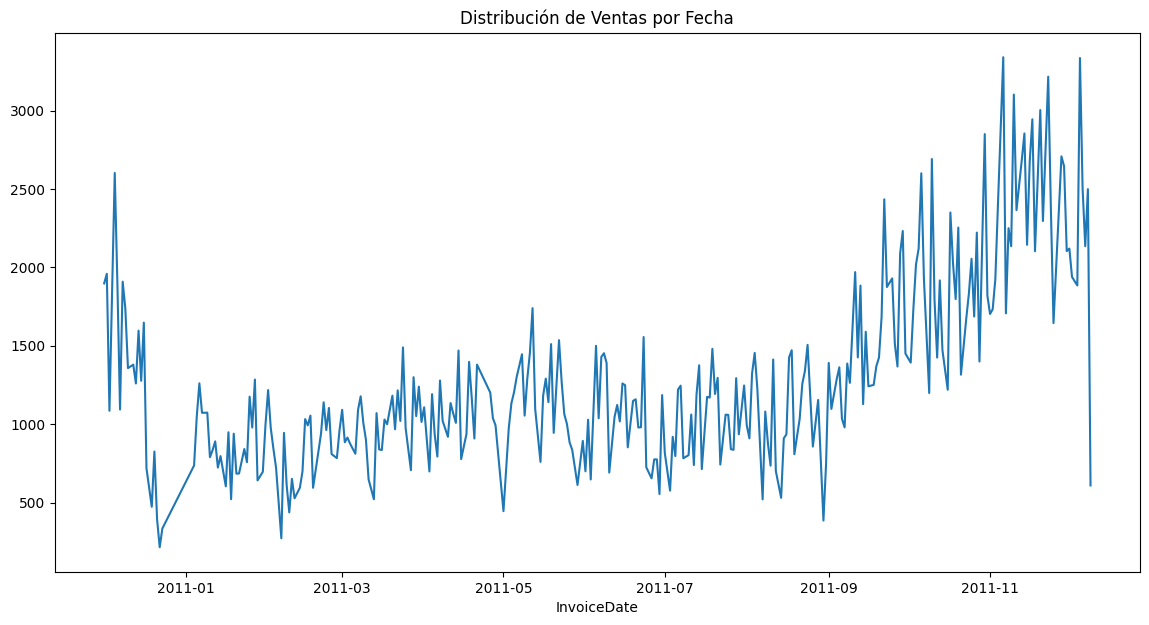

In [5]:
# Distribución de ventas por país
plt.figure(figsize=(12, 8))
df['Country'].value_counts().plot(kind='bar')
plt.title('Distribución de Ventas por País')
plt.show()

# Productos más vendidos
top_products = df['Description'].value_counts().head(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Productos Más Vendidos')
plt.show()

# Distribución de ventas por fecha
df['InvoiceDate'].dt.date.value_counts().sort_index().plot(figsize=(14, 7))
plt.title('Distribución de Ventas por Fecha')
plt.show()


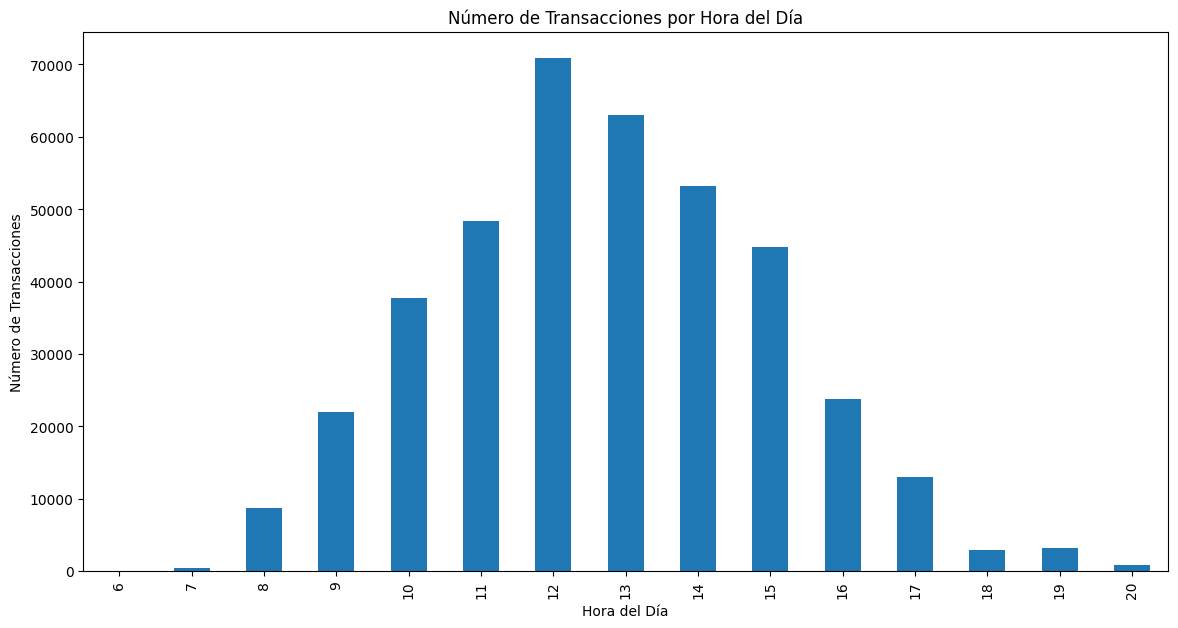

In [6]:
# Transacciones por hora del día
df['Hour'] = df['InvoiceDate'].dt.hour
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(14, 7))
plt.title('Número de Transacciones por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Transacciones')
plt.show()


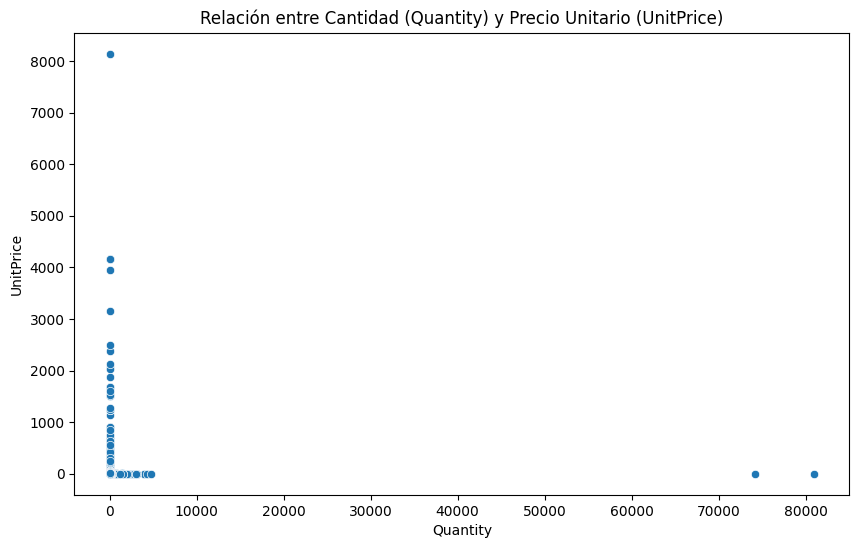

In [7]:
# Relación entre Quantity y UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Relación entre Cantidad (Quantity) y Precio Unitario (UnitPrice)')
plt.show()


Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'TotalSpent',
       'Hour'],
      dtype='object')


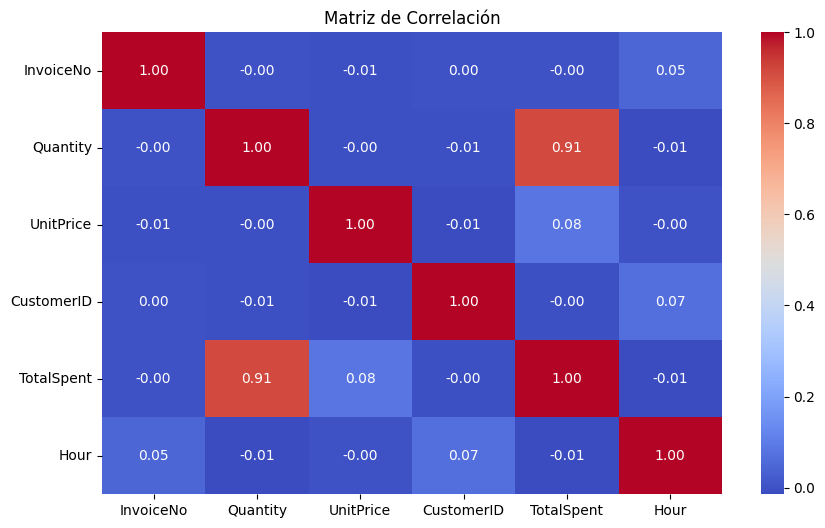

In [8]:
# Matriz de correlación
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Comprobar las columnas seleccionadas
print(df_numeric.columns)


corr_matrix = df_numeric.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


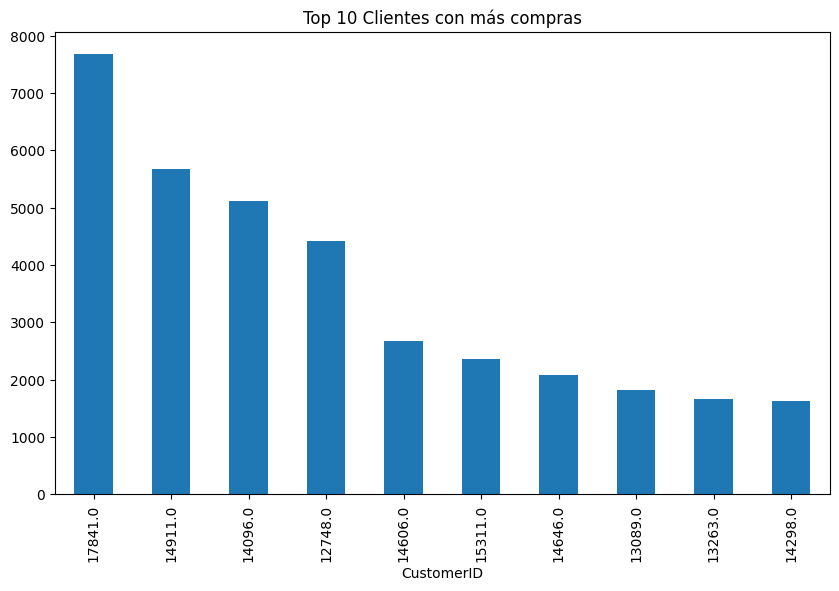

In [9]:
# Los clientes con mayor ventas
top_products = df['CustomerID'].value_counts().head(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Clientes con más compras')
plt.show()

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalSpent, dtype: float64


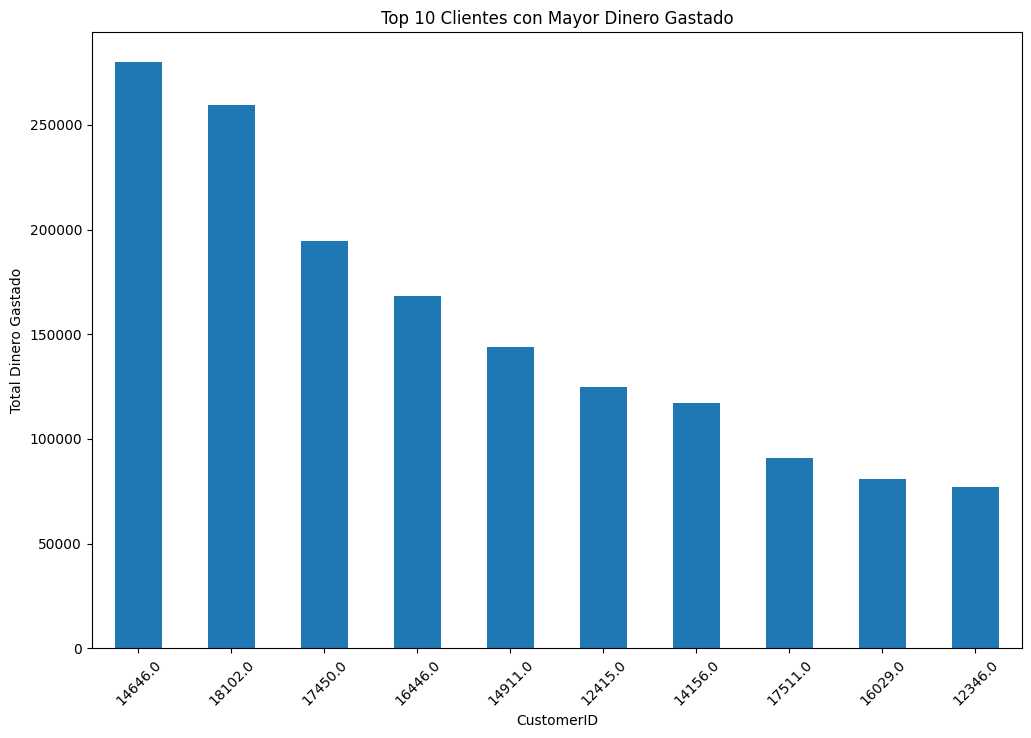

In [10]:

# Agrupar por CustomerID y sumar el total gastado
top_customers = df.groupby('CustomerID')['TotalSpent'].sum().sort_values(ascending=False).head(10)

# Mostrar los top 10 clientes
print(top_customers)

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
top_customers.plot(kind='bar')
plt.title('Top 10 Clientes con Mayor Dinero Gastado')
plt.xlabel('CustomerID')
plt.ylabel('Total Dinero Gastado')
plt.xticks(rotation=45)
plt.show()


Country
United Kingdom    7285024.644
Netherlands        285446.340
Eire               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: TotalSpent, dtype: float64


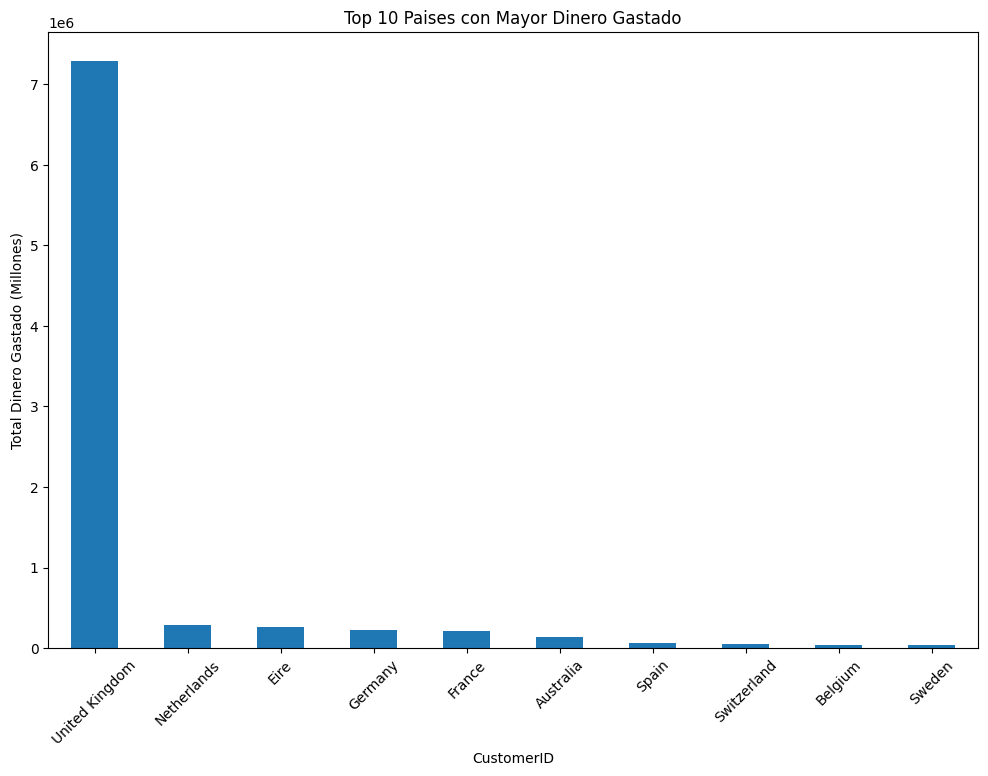

In [15]:

# Agrupar por CustomerID y sumar el total gastado
top_countries = df.groupby('Country')['TotalSpent'].sum().sort_values(ascending=False).head(10)

# Mostrar los top 10 clientes
print(top_countries)

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar')
plt.title('Top 10 Paises con Mayor Dinero Gastado')
plt.xlabel('CustomerID')
plt.ylabel('Total Dinero Gastado (Millones)')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Agrupar por CustomerID y sumar el total gastado, seleccionando los 10 mayores

top_customers = df.groupby('CustomerID')['TotalSpent'].sum().sort_values(ascending=False).head(10).index


# Filtrar el DataFrame para que solo contenga los datos de los top 10 clientes
df_top_customers = df[df['CustomerID'].isin(top_customers)]

# Convertir InvoiceDate a formato datetime
df_top_customers['InvoiceDate'] = pd.to_datetime(df_top_customers['InvoiceDate'])

# Agrupar por CustomerID y por día, sumando el dinero gastado
df_grouped = df_top_customers.groupby(['CustomerID', df_top_customers['InvoiceDate'].dt.date])['TotalSpent'].sum().unstack(fill_value=0)



C:\Users\luish\AppData\Local\Temp\ipykernel_24064\3577486653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_customers['InvoiceDate'] = pd.to_datetime(df_top_customers['InvoiceDate'])


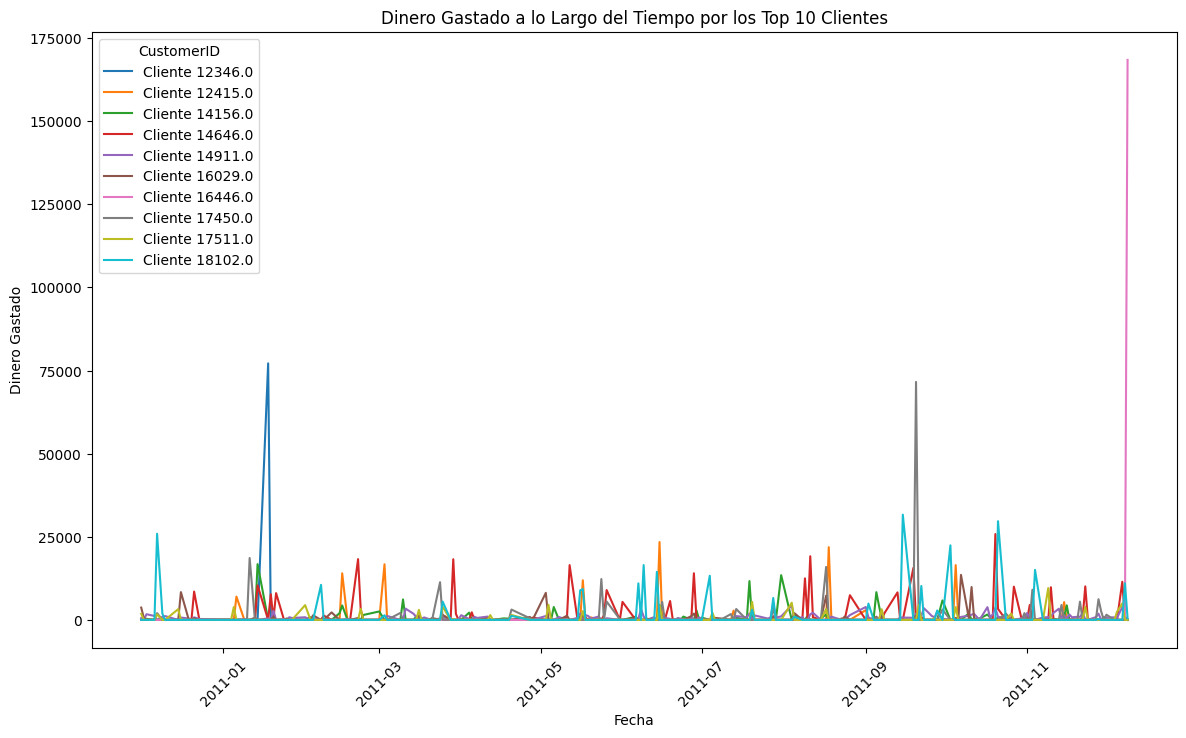

In [13]:
import matplotlib.pyplot as plt

# Graficar el dinero gastado a lo largo del tiempo para los top 10 clientes
plt.figure(figsize=(14, 8))
for customer in df_grouped.index:
    plt.plot(df_grouped.columns, df_grouped.loc[customer], label=f'Cliente {customer}')

plt.title('Dinero Gastado a lo Largo del Tiempo por los Top 10 Clientes')
plt.xlabel('Fecha')
plt.ylabel('Dinero Gastado')
plt.legend(title='CustomerID')
plt.xticks(rotation=45)
plt.show()
